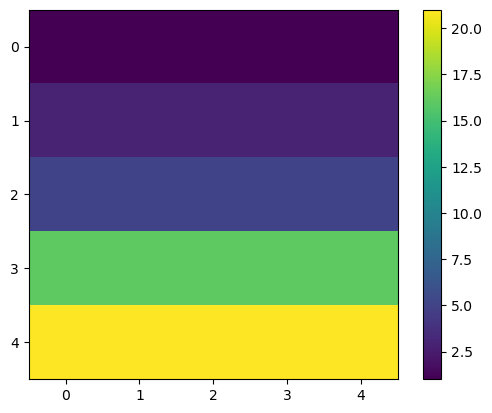

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


vals = np.array([1,3,5,16,21])
iswater = 16

data = np.zeros((5,5))
for i, val in enumerate(vals):
    data[i,:] = val
plt.imshow(data)
plt.colorbar()


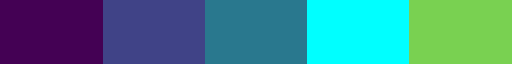

In [2]:

# colormap from rgb values + cyan for water
rgbs = mpl.cm.viridis(np.linspace(0,1,len(vals)+1))

idx = np.where(vals==iswater)[0][0]
rgbs[idx,:] = list(mpl.colors.to_rgb('cyan')) + [1]

cmap = mpl.colors.ListedColormap(rgbs[:-1]).with_extremes(over=rgbs[-1])
cmap


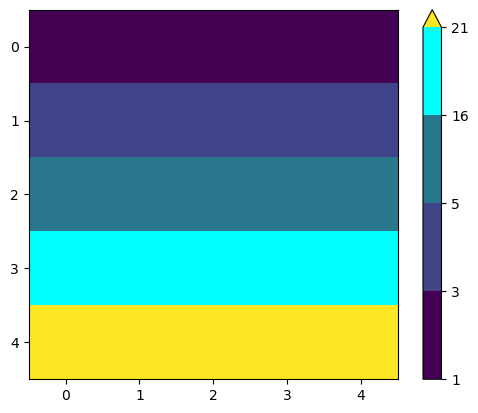

In [3]:
norm = mpl.colors.BoundaryNorm(vals,cmap.N, extend='max')
plt.imshow(data, cmap=cmap, norm=norm)
plt.colorbar()

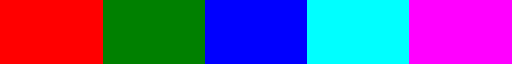

In [4]:

# or from list of colors
                                  # 1      3         5      16     this one doesnt show!             21
cmap = mpl.colors.ListedColormap(['red', 'green', 'blue', 'cyan', 'magenta']).with_extremes(over='yellow')
cmap

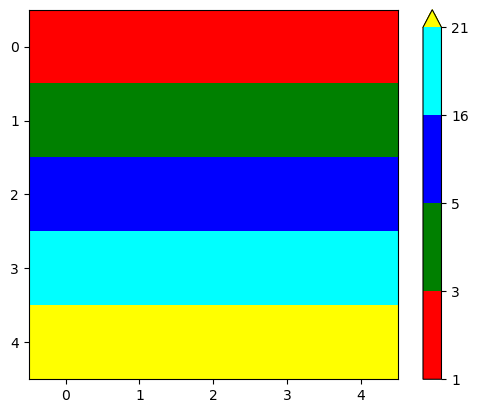

In [5]:
norm = mpl.colors.BoundaryNorm(vals,cmap.N, extend='max')
plt.imshow(data, cmap=cmap, norm=norm)
plt.colorbar()
